# Project - Financial Risk analysis
#### By Gerardo Mora Cuevas

### Machine Learning - Risk Modeling

### Dataset: Cymbal Investments

First, let's use pandas to read the csv file and save the data as a Dataframe:

In [1]:
import pandas as pd
df = pd.read_csv("cymbal_investments_cleaned.csv")

Let's take a look at the first rows of the dataframe:

In [2]:
df.head()

,TargetCompID,SenderCompID,Symbol,Quantity,StrikePrice,LastPx,TradeReportID,TradeDate,CFICode,Side,OrderID,PartyID,PartyIDSource,PartyRole,Sending_Date,Sending_Time,Transact_Date,Transact_Time,Maturity_Date,Maturity_Time
0,MOMOES-COMPID,MDOC,ESM0,1,2954.12,2953.12,50bfaefb-53f3-4454-92af-f2fc11ab9176-0,18/05/2020,MMMXXX,LONG,50bfaefb-53f3-4454-92af-f2fc11ab9176,MOMOES,PROP CODE,INITIATING TRADER,18/05/2020,17:27:57,18/05/2020,17:27:58,18/05/2020,17:28:58
1,MOMOES-COMPID,MDOC,ESM0,1,2953.62,2953.88,9fbe8d52-fcf0-4f2d-a038-ac2aff7673d9-0,18/05/2020,MMMXXX,LONG,9fbe8d52-fcf0-4f2d-a038-ac2aff7673d9,MOMOES,PROP CODE,INITIATING TRADER,18/05/2020,17:29:14,18/05/2020,17:29:14,18/05/2020,17:30:14
2,MOMOES-COMPID,MDOC,ESM0,1,2953.88,2953.62,3c55841c-08e3-4e48-b46b-2496383778f8-0,18/05/2020,MMMXXX,LONG,3c55841c-08e3-4e48-b46b-2496383778f8,MOMOES,PROP CODE,INITIATING TRADER,18/05/2020,18:28:40,18/05/2020,18:28:41,18/05/2020,18:29:41
3,MOMOES-COMPID,MDOC,ESM0,1,2954.88,2953.38,abf074a5-d537-41d2-99e0-c928eb17e310-0,18/05/2020,MMMXXX,LONG,abf074a5-d537-41d2-99e0-c928eb17e310,MOMOES,PROP CODE,INITIATING TRADER,18/05/2020,18:30:03,18/05/2020,18:30:04,18/05/2020,18:31:04
4,MOMOES-COMPID,MDOC,ESM0,1,2948.12,2948.88,a744e8dc-42e2-48dd-9178-58a2d20f2c33-0,18/05/2020,MMMXXX,LONG,a744e8dc-42e2-48dd-9178-58a2d20f2c33,MOMOES,PROP CODE,INITIATING TRADER,18/05/2020,20:10:16,18/05/2020,20:10:17,18/05/2020,20:11:17


### Step 1: Defining the target variable and selecting features.

In this case, let's asume that the target variable is the "Side" column, which indicates whether the transaction is "LONG" or "SHORT". Since I am interested in predicting financial risks, I might want to use "Side" as an indication of risk. Let's convert "LONG" to 0 and "Short" to 1:

In [3]:
y = df["Side"].apply(lambda x: 1 if x == 'SHORT' else 0)
features = ["StrikePrice","LastPx"]
X = df[features]

### Step 2: Divide the train and test sets.

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [5]:
print("Dimensions of X_train:", x_train.shape)
print("Dimensions of y_train:", y_train.shape)
print("Dimensions of X_test:", x_test.shape)
print("Dimensions of y_test:", y_test.shape)

Dimensions of X_train: (40000, 2)
Dimensions of y_train: (40000,)
Dimensions of X_test: (10000, 2)
Dimensions of y_test: (10000,)


### Step 3: Create and train the classification model.

#### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred = logistic_model.predict(x_test)

#### Model Evaluation

In [7]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)


print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("\nConfusion Matrix: \n\n", conf_matrix)
print("\nClassification Report: \n", class_report)

Accuracy:  0.6283
Precision:  0.2842857142857143

Confusion Matrix: 

 [[6084  501]
 [3216  199]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.92      0.77      6585
           1       0.28      0.06      0.10      3415

    accuracy                           0.63     10000
   macro avg       0.47      0.49      0.43     10000
weighted avg       0.53      0.63      0.54     10000



#### Support Vector Machine (SVM)

In [8]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

#### Model Evaluation

In [9]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
precision_svm = precision_score(y_test,y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test,y_pred_svm)
class_report_svm = classification_report(y_test,y_pred_svm)

print("Accuracy: ", accuracy_svm)
print("Precision: ",precision_svm)
print("\nConfusion Matrix: \n\n", conf_matrix_svm)
print("\nClassification Report: \n", class_report_svm)

Accuracy:  0.6585
Precision:  0.0

Confusion Matrix: 

 [[6585    0]
 [3415    0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      1.00      0.79      6585
           1       0.00      0.00      0.00      3415

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000



D:\Mora\Programas\Anaconda\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Mora\Programas\Anaconda\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Mora\Programas\Anaconda\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Mora\Programas\Anaconda\Anaconda\Lib\sit

#### Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
y_pred_tree = tree_model.predict(x_test)

#### Evaluation

In [12]:
accuracy_tree = accuracy_score(y_test,y_pred_tree)
precision_tree = precision_score(y_test,y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test,y_pred_tree)
class_report_tree = classification_report(y_test,y_pred_tree)

print("Accuracy: ", accuracy_tree)
print("Precision: ", precision_tree)
print("\nConfusion Matrix: \n\n", conf_matrix_tree)
print("\nClassification Report: \n", class_report_tree)

Accuracy:  0.6812
Precision:  0.5367670877874959

Confusion Matrix: 

 [[5155 1430]
 [1758 1657]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.78      0.76      6585
           1       0.54      0.49      0.51      3415

    accuracy                           0.68     10000
   macro avg       0.64      0.63      0.64     10000
weighted avg       0.67      0.68      0.68     10000



#### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(x_train,y_train)
y_pred_forest = forest_model.predict(x_test)

#### Evaluation

In [14]:
accuracy_forest = accuracy_score(y_test,y_pred_forest)
precision_forest = precision_score(y_test,y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test,y_pred_forest)
class_report_forest = classification_report(y_test,y_pred_forest)

print("Accuracy: ", accuracy_forest)
print("Precision: ", precision_forest)
print("\nConfusion Matrix: \n\n", conf_matrix_forest)
print("\nClassification Report: \n", class_report_forest)

Accuracy:  0.69
Precision:  0.552870090634441

Confusion Matrix: 

 [[5253 1332]
 [1768 1647]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.80      0.77      6585
           1       0.55      0.48      0.52      3415

    accuracy                           0.69     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.68      0.69      0.68     10000



#### Ada Boosting Classifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier()
ada_boost_model.fit(x_train,y_train)
y_pred_ada_boost = ada_boost_model.predict(x_test)

#### Evaluation

In [16]:
accuracy_ada_boost = accuracy_score(y_test,y_pred_ada_boost)
precision_ada_boost = precision_score(y_test,y_pred_ada_boost)
conf_matrix_ada_boost = confusion_matrix(y_test,y_pred_ada_boost)
class_report_ada_boost = classification_report(y_test,y_pred_ada_boost)

print("Accuracy: ", accuracy_ada_boost)
print("Precision: ", precision_ada_boost)
print("\nConfusion Matrix: \n\n", conf_matrix_ada_boost)
print("\nClassification Report: \n", class_report_ada_boost)

Accuracy:  0.6782
Precision:  0.5332882730652247

Confusion Matrix: 

 [[5204 1381]
 [1837 1578]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      6585
           1       0.53      0.46      0.50      3415

    accuracy                           0.68     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.67      0.68      0.67     10000



### Step 4: Model Evaluation and Comparison

#### Bar graph with accuracies

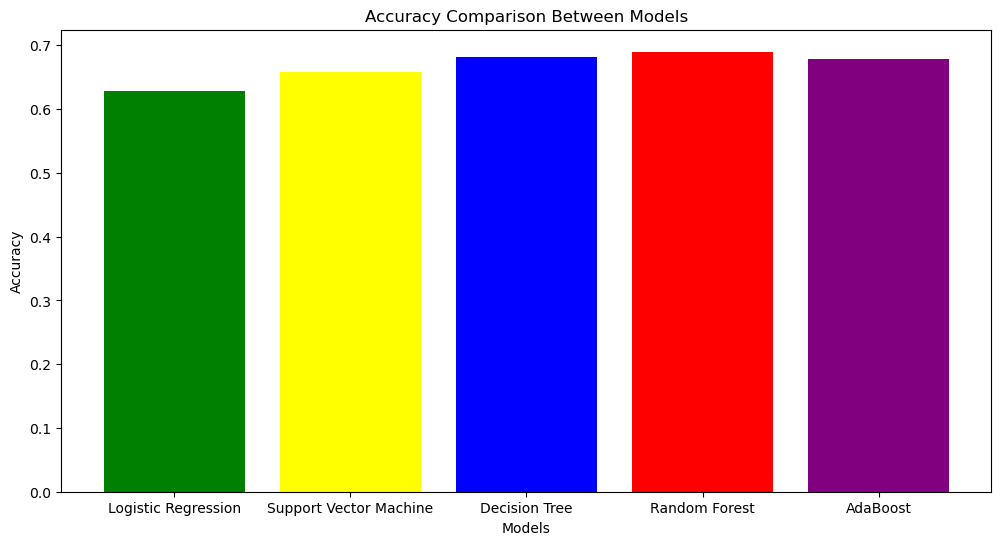

In [17]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "AdaBoost"]

accuracies = [accuracy, accuracy_svm, accuracy_tree, accuracy_forest,accuracy_ada_boost]

plt.figure(figsize=(12,6))
plt.bar(models,accuracies,color=["green","yellow","blue","red","purple"])

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Between Models")

plt.show()

#### Comparative Table

In [18]:
results = pd.DataFrame({
    "model": ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "AdaBoost"],
    "accuracy": [accuracy, accuracy_svm, accuracy_tree, accuracy_forest,accuracy_ada_boost],
    "precision":[precision, precision_svm, precision_tree, precision_forest, precision_ada_boost]
})

print(results)

                    model  accuracy  precision
0     Logistic Regression    0.6283   0.284286
1  Support Vector Machine    0.6585   0.000000
2           Decision Tree    0.6812   0.536767
3           Random Forest    0.6900   0.552870
4                AdaBoost    0.6782   0.533288
